In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

In [74]:
df = pd.read_csv("./DATA/heart_disease_uci.csv")
#checking head
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [75]:
##Cleaning the Data
#Converting true/false to 1 and 0
df["fbs"] = df["fbs"].apply(lambda x: 1 if x == True else 0)
df["exang"] = df["exang"].apply(lambda x: 1 if x == True else 0)
#convert sex to 1 = Male and 0 = Female
df["sex"] = df["sex"].apply(lambda x: 1 if x == "Male" else 0)

<Axes: >

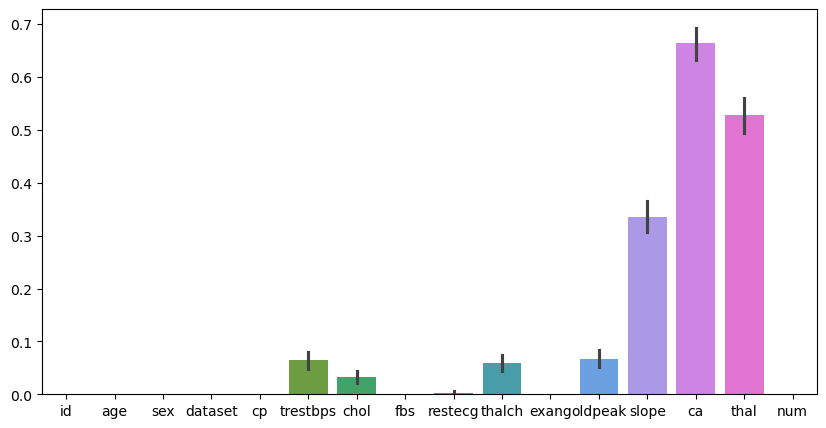

In [76]:
#Checking how man null values we have
plt.figure(figsize=(10,5))
sns.barplot(df.isnull())

In [77]:
df["cp"].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [78]:
#change cp to numbers 
#0 typical angina
#1 asymptomatic
#2 non-aginal
#3 atypical angina
df["cp"] = df["cp"].apply(lambda x: 0 if x == "typical angina" else 1 if x == "asymptomatic" else 2 if x == "non-anginal" else 3)

In [81]:
df["cp"].unique()

array([0, 1, 2, 3])

In [83]:
#apply -1 so the ML knows that there is no Value
df["ca"].fillna(-1, inplace=True)
df = pd.get_dummies(df, columns=['slope', 'thal'], drop_first=True)
#same applies to slope 
df.drop("slope", axis=1, inplace=True)
#change the thal colums to dummies and replace NaN with Uknown
df["thal"].fillna("unknown", inplace=True)
df.drop("thal", axis=1, inplace=True)


/var/folders/82/b2076l1n0q5dc20703ljd2nc0000gn/T/ipykernel_48439/442651314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ca"].fillna(-1, inplace=True)


KeyError: "None of [Index(['slope', 'thal'], dtype='object')] are in the [columns]"

In [84]:
#for the rest we will use for the NaN values the median values
df["trestbps"].fillna(df["trestbps"].median(),inplace=True)
df["chol"].fillna(df["chol"].median(),inplace=True)
df["thalch"].fillna(df["thalch"].median(),inplace=True)
df["oldpeak"].fillna(df["oldpeak"].median(),inplace=True)

/var/folders/82/b2076l1n0q5dc20703ljd2nc0000gn/T/ipykernel_48439/501606690.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["trestbps"].fillna(df["trestbps"].median(),inplace=True)
/var/folders/82/b2076l1n0q5dc20703ljd2nc0000gn/T/ipykernel_48439/501606690.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [85]:
#Drop Columns that has no value
df.drop("dataset",axis=1,inplace=True)
df.drop("restecg",axis=1,inplace=True)
df.drop("id", axis=1 ,inplace=True)

In [86]:
df = df.loc[:, ~df.columns.duplicated()]

In [87]:
# is there any duplicated columns
print(df.columns.duplicated())

[False False False False False False False False False False False False
 False False False]


In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,0,145.0,233.0,1,150.0,0,2.3,0.0,0,False,False,False,False
1,67,1,1,160.0,286.0,0,108.0,1,1.5,3.0,2,True,False,True,False
2,67,1,1,120.0,229.0,0,129.0,1,2.6,2.0,1,True,False,False,True
3,37,1,2,130.0,250.0,0,187.0,0,3.5,0.0,0,False,False,True,False
4,41,0,3,130.0,204.0,0,172.0,0,1.4,0.0,0,False,True,True,False


In [93]:
print(df.isnull().sum())

age                       0
sex                       0
cp                        0
trestbps                  0
chol                      0
fbs                       0
thalch                    0
exang                     0
oldpeak                   0
ca                        0
num                       0
slope_flat                0
slope_upsloping           0
thal_normal               0
thal_reversable defect    0
dtype: int64


In [89]:
#After Cleaning the data we are now training our modell
X = df.drop(["cp"],axis=1)
y = df['cp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [90]:
#Using GridSearch to find the best Hyperparameters and training our modell
param= {"n_estimators":[1,10, 50, 300], "min_samples_leaf":[12, 3, 10, 6], "min_samples_split":[2, 5, 10, 12], "max_depth":[None, 15,10, 20, 30]}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'),param_grid=param,verbose=3)

grid.fit(X_train, y_train)

predicted = grid.predict(X_test)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.434 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.550 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.341 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.434 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=1;, score=0.383 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=10;, score=0.550 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=10;, score=0.628 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=12, min_samples_split=2, n_estimators=10;, score=0.527 

In [ ]:
#Evulation of Random Forest
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.17      0.17      0.17        12
           1       0.72      0.78      0.75       148
           2       0.35      0.25      0.29        68
           3       0.48      0.54      0.51        48

    accuracy                           0.58       276
   macro avg       0.43      0.44      0.43       276
weighted avg       0.56      0.58      0.57       276

